In [1]:
import pandas as pd 
import numpy as np

In [2]:
housing=pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
X=housing.drop("median_house_value",axis=1)
y=housing['median_house_value']

In [5]:
X.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5203,-118.28,33.93,42.0,1898.0,460.0,1503.0,429.0,2.5179,<1H OCEAN
7262,-118.23,34.00,35.0,167.0,60.0,267.0,55.0,1.5227,<1H OCEAN
11863,-121.24,40.31,36.0,1597.0,301.0,632.0,262.0,3.5962,INLAND
1262,-121.72,37.98,5.0,7105.0,1143.0,3523.0,1088.0,5.0468,INLAND
7541,-118.20,33.90,26.0,1000.0,275.0,1178.0,263.0,2.1200,<1H OCEAN


In [6]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [7]:
ratio=(X['total_bedrooms']/X['total_rooms']).median()

In [8]:
mask=X['total_bedrooms'].isnull()

In [9]:
X.loc[mask,'total_bedrooms']=X.loc[mask,'total_rooms']*ratio

In [10]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

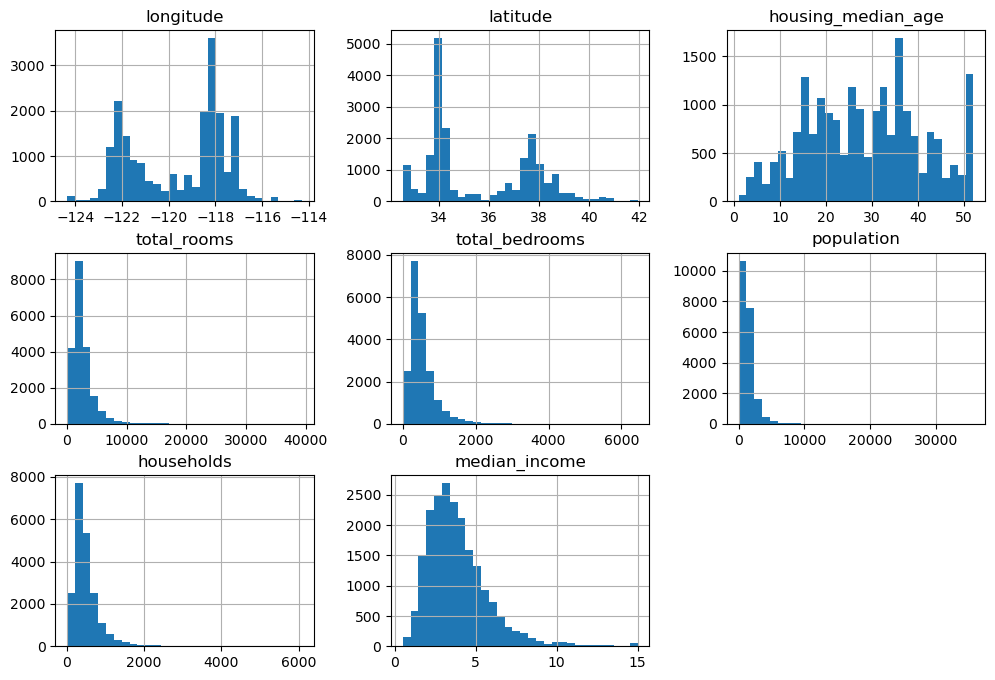

In [11]:
import matplotlib.pyplot as plt
X.hist(bins=30,figsize=(12,8))
plt.show()

In [12]:
X=pd.get_dummies(X,columns=['ocean_proximity'],drop_first=True)

In [13]:
X.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10296,-117.87,33.92,14.0,4039.0,669.0,1905.0,670.0,6.3303,False,False,False,False
17470,-119.81,34.47,26.0,4382.0,618.0,1728.0,587.0,7.4734,False,False,False,True
17516,-121.93,37.33,44.0,2142.0,358.0,846.0,375.0,5.4273,False,False,False,False
14816,-117.18,32.70,42.0,1691.0,286.0,761.0,281.0,5.1386,False,False,False,True
11913,-117.43,33.96,28.0,3747.0,651.0,2399.0,646.0,3.8682,True,False,False,False


In [14]:
dum_cols=['ocean_proximity_NEAR BAY','ocean_proximity_ISLAND','ocean_proximity_NEAR OCEAN','ocean_proximity_INLAND']

In [15]:
X[dum_cols]=X[dum_cols].astype(int)

In [16]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(16512, 12)

In [19]:
X_test.shape

(4128, 12)

In [20]:
y_train.shape

(16512,)

In [21]:
y_test.shape

(4128,)

In [22]:
X_train.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [23]:
y_train.isnull().sum()

np.int64(0)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [37]:
print("r2:",r2_score(y_test,y_pred))
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean square error:",mean_squared_error(y_test,y_pred))


r2: 0.6321957324579182
mean absolute error: 50273.75003821435
mean square error: 4819740144.224621


In [38]:
import numpy as np

In [39]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [40]:
print("rmse:",rmse)

rmse: 69424.34835289864
